# Validate new compendia

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
from textwrap import fill
import matplotlib.pyplot as plt
import utils

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User param
# Threshold: if median accessory expression of PAO1 samples > threshold then this sample is binned as PAO1
threshold = 25

In [3]:
# Save PAO1 and PA14 compendia with SRA labels to file
pao1_compendium_SRA_filename = "pao1_compendium_sra_label.tsv"
pa14_compendium_SRA_filename = "pa14_compendium_sra_label.tsv"

# Save PAO1 and PA14 compendia without SRA labels to file
pao1_compendium_filename = "pao1_compendium.tsv"
pa14_compendium_filename = "pa14_compendium.tsv"

# Save prebinned data
# All samples mapped to the PAO1 and PA14 references
pao1_prebinned_compendium_filename = "pao1_prebinned_compendium.tsv"
pa14_prebinned_compendium_filename = "pa14_prebinned_compendium.tsv"

In [4]:
# Load data
pao1_expression = pd.read_csv(pao1_compendium_SRA_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_compendium_SRA_filename, sep="\t", index_col=0, header=0)

pao1_expression_prebin = pd.read_csv(
    pao1_prebinned_compendium_filename, sep="\t", index_col=0, header=0
)
pa14_expression_prebin = pd.read_csv(
    pa14_prebinned_compendium_filename, sep="\t", index_col=0, header=0
)

## Get core and accessory annotations

In [5]:
# Downloaded from the BACTOME website
# These files contain PAO1 gene ids and their homologous PA14 id and vice versa
# These homologous mappings are what we used to define what are core and accessory genes
pao1_annot_filename = "PAO1_ID_2_PA14_ID_PAO1ref.csv" 
pa14_annot_filename = "PA14_ID_2_PAO1_ID_PA14ref.csv"

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5357
Number of PAO1-specific genes: 203
Number of PA14-specific genes: 535


In [6]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

## Format data examining accessory genome

In [7]:
# Create accessory df for PAO1 compendium
# accessory gene ids | median accessory expression | strain label

# PAO1-only genes in PAO1 compendium
pao1_acc_pao1_compendium = pao1_expression[pao1_acc]
pao1_acc_pao1_compendium["median acc expression"] = pao1_acc_pao1_compendium.median(
    axis=1
)

# PA14-only genes in PAO1 compendium
pa14_acc_numeric = pa14_acc.copy()
pa14_acc_numeric.remove("Strain type")
pao1_binned_sample_ids = list(pao1_expression.index)
pa14_acc_pao1_compendium = pa14_expression_prebin.loc[
    pao1_binned_sample_ids, pa14_acc_numeric
]
pa14_acc_pao1_compendium["median acc expression"] = pa14_acc_pao1_compendium.median(
    axis=1
)

pao1_acc_pao1_compendium.head()

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PA2372,PA1152,PA1427,PA0819,PA2234,PA2183,PA5471.1,PA3066,PA1381,PA2102,...,PA2186,PA0643,PA2734,PA3142,PA1384,PA2190,PA2119,PA3701,PA2727,median acc expression
ERX541572,554.040437,114.304459,8.068550,10.758067,106.235909,91.443567,1.344758,182.887135,36.308475,69.927434,...,2.689517,209.782301,1048.911507,212.471818,174.818585,76.651226,111.614942,2033.274614,150.612934,82.030259
ERX541573,568.171312,77.318158,23.429745,5.857436,36.316104,96.061954,1.171487,44.516515,23.429745,76.146671,...,1.171487,228.440012,633.774597,294.043297,101.919390,12.886360,140.578469,1315.580171,180.409035,82.589850
ERX541574,737.342182,69.187604,15.814310,9.883943,55.350083,108.723378,3.953577,43.489351,29.651830,102.793012,...,1.976789,247.098586,533.732946,253.028952,209.539601,7.907155,166.050250,1759.341934,241.168220,87.967097
ERX541575,577.692043,63.990503,14.220112,21.330168,39.105308,63.990503,1.777514,47.992877,24.885196,95.985755,...,5.332542,195.526538,595.467183,254.184499,62.212989,8.887570,165.308800,1486.001686,245.296929,76.433101
ERX541576,359.909010,56.487961,40.348544,19.367301,64.557670,35.506719,1.613942,45.190369,19.367301,75.855262,...,1.613942,203.356661,661.716118,227.565787,87.152855,20.981243,156.552350,1273.400041,221.110020,79.083146


In [8]:
pa14_acc_pao1_compendium.head()

,PA14_10300,PA14_41300,PA14_55060,PA14_10970,PA14_07480,PA14_22190,PA14_15450,PA14_33300,PA14_31200,PA14_54870,...,PA14_51580,PA14_51530,PA14_53600,PA14_23420,PA14_62040,PA14_59650,PA14_15350,PA14_35730,PA14_54960,median acc expression
ERX541572,11.068173,207.528242,49.806778,8.301130,13.835216,2.767043,2.767043,2.767043,2.767043,2.767043,...,16.602259,5.534086,2.767043,8.301130,282.238410,2.767043,2.767043,2.767043,5.534086,5.534086
ERX541573,29.712977,103.995418,39.167105,4.051770,1.350590,1.350590,1.350590,1.350590,2.701180,1.350590,...,54.023594,4.051770,1.350590,1.350590,298.480356,1.350590,1.350590,1.350590,2.701180,2.701180
ERX541574,19.330140,102.691369,42.284681,1.208134,2.416268,1.208134,1.208134,1.208134,1.208134,4.832535,...,48.325350,2.416268,1.208134,1.208134,420.430547,2.416268,3.624401,1.208134,2.416268,2.416268
ERX541575,22.059417,72.194456,48.129637,6.016205,4.010803,2.005402,2.005402,2.005402,6.016205,4.010803,...,62.167448,2.005402,2.005402,2.005402,344.929069,2.005402,8.021606,2.005402,4.010803,4.010803
ERX541576,11.014330,80.771751,64.250257,3.671443,1.835722,1.835722,1.835722,1.835722,3.671443,1.835722,...,51.400205,5.507165,1.835722,1.835722,372.651489,1.835722,5.507165,3.671443,3.671443,3.671443


In [9]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_pao1_compendium_label = pao1_acc_pao1_compendium.merge(
    pa14_acc_pao1_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

pao1_pa14_acc_pao1_compendium_label.head()

,PA2372,PA1152,PA1427,PA0819,PA2234,PA2183,PA5471.1,PA3066,PA1381,PA2102,...,PA14_51580,PA14_51530,PA14_53600,PA14_23420,PA14_62040,PA14_59650,PA14_15350,PA14_35730,PA14_54960,median acc expression_pa14
ERX541572,554.040437,114.304459,8.068550,10.758067,106.235909,91.443567,1.344758,182.887135,36.308475,69.927434,...,16.602259,5.534086,2.767043,8.301130,282.238410,2.767043,2.767043,2.767043,5.534086,5.534086
ERX541573,568.171312,77.318158,23.429745,5.857436,36.316104,96.061954,1.171487,44.516515,23.429745,76.146671,...,54.023594,4.051770,1.350590,1.350590,298.480356,1.350590,1.350590,1.350590,2.701180,2.701180
ERX541574,737.342182,69.187604,15.814310,9.883943,55.350083,108.723378,3.953577,43.489351,29.651830,102.793012,...,48.325350,2.416268,1.208134,1.208134,420.430547,2.416268,3.624401,1.208134,2.416268,2.416268
ERX541575,577.692043,63.990503,14.220112,21.330168,39.105308,63.990503,1.777514,47.992877,24.885196,95.985755,...,62.167448,2.005402,2.005402,2.005402,344.929069,2.005402,8.021606,2.005402,4.010803,4.010803
ERX541576,359.909010,56.487961,40.348544,19.367301,64.557670,35.506719,1.613942,45.190369,19.367301,75.855262,...,51.400205,5.507165,1.835722,1.835722,372.651489,1.835722,5.507165,3.671443,3.671443,3.671443


In [10]:
# Create accessory df for PA14 compendium
# accessory gene ids | median accessory expression | strain label

# PA14-only genes in PA14 compendium
pa14_acc_pa14_compendium = pa14_expression[pa14_acc]
pa14_acc_pa14_compendium["median acc expression"] = pa14_acc_pa14_compendium.median(
    axis=1
)

# PAO1-only genes in PA14 compendium
pao1_acc_numeric = pao1_acc.copy()
pao1_acc_numeric.remove("Strain type")
pa14_binned_sample_ids = list(pa14_expression.index)
pao1_acc_pa14_compendium = pao1_expression_prebin.loc[
    pa14_binned_sample_ids, pao1_acc_numeric
]
pao1_acc_pa14_compendium["median acc expression"] = pao1_acc_pa14_compendium.median(
    axis=1
)

pa14_acc_pa14_compendium.head()

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PA14_10300,PA14_41300,PA14_55060,PA14_10970,PA14_07480,PA14_22190,PA14_15450,PA14_33300,PA14_31200,PA14_54870,...,PA14_51580,PA14_51530,PA14_53600,PA14_23420,PA14_62040,PA14_59650,PA14_15350,PA14_35730,PA14_54960,median acc expression
ERX1477379,24.487579,116.316001,197.941265,11.223474,5631.122902,371.394951,18.365684,147.945791,30.609474,1982.473600,...,11.223474,1719.232123,1411.096752,14570.109628,694.835060,57.137685,1545.778437,292.830635,87.747159,117.336317
ERX1477380,32.203116,118.078091,122.848923,16.101558,3390.868818,147.895791,20.872390,103.169241,18.486974,1200.460593,...,8.945310,1300.648064,818.197682,8477.172045,431.163939,43.533842,1474.187077,181.291615,54.268214,96.311170
ERX1477381,32.765774,111.070419,105.516898,12.773098,2358.580353,107.182955,21.658732,114.402532,19.992675,985.194619,...,12.217746,990.192788,712.516739,7267.892884,355.425342,28.322957,1383.937424,161.052108,43.317464,83.025138
ERX2174773,4.547711,33.425674,82.086180,8.413265,476.372708,38.882927,37.291229,599.615671,1.819084,47.750964,...,3.638169,3719.117902,59.347626,2126.282190,112.555843,3.865554,991.628343,21.829012,10.004964,34.562602
ERX2174774,4.990578,35.932163,79.849251,8.483983,432.433597,31.690171,41.172270,426.444904,2.994347,50.903897,...,5.489636,3758.653941,63.380343,2185.374176,110.541306,3.992463,935.733405,24.952891,14.971734,36.431221


In [11]:
pao1_acc_pa14_compendium.head()

,PA2372,PA1152,PA1427,PA0819,PA2234,PA2183,PA5471.1,PA3066,PA1381,PA2102,...,PA2186,PA0643,PA2734,PA3142,PA1384,PA2190,PA2119,PA3701,PA2727,median acc expression
ERX1477379,1.140150,1.140150,30.784049,14.821949,1.140150,1.140150,121.996046,1.140150,1.140150,1.140150,...,1.140150,1.140150,1.140150,134.537695,1.140150,1.140150,1.140150,1980.440482,129.977096,1.140150
ERX1477380,0.655574,0.655574,17.044918,12.455902,1.311148,0.655574,47.201311,0.655574,0.655574,0.655574,...,0.655574,0.655574,0.655574,138.981638,0.655574,0.655574,0.655574,1520.275563,200.605572,0.655574
ERX1477381,0.612870,0.612870,20.837575,11.644527,1.225740,0.612870,46.578108,0.612870,0.612870,0.612870,...,0.612870,0.612870,0.612870,116.445270,0.612870,0.612870,0.612870,1594.074454,235.954888,0.612870
ERX2174773,0.254462,0.254462,4.325861,2.035699,0.254462,0.254462,0.254462,0.254462,0.254462,0.254462,...,0.254462,0.254462,0.254462,11.450809,0.254462,0.254462,0.254462,1144.572005,366.934822,0.254462
ERX2174774,0.277911,0.277911,5.558221,1.111644,0.277911,0.277911,0.277911,0.277911,0.277911,0.277911,...,0.277911,0.277911,0.277911,6.947776,0.277911,0.277911,0.277911,976.023637,533.033410,0.277911


In [12]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_pa14_compendium_label = pa14_acc_pa14_compendium.merge(
    pao1_acc_pa14_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pa14", "_pao1"],
)

pao1_pa14_acc_pa14_compendium_label.head()

,PA14_10300,PA14_41300,PA14_55060,PA14_10970,PA14_07480,PA14_22190,PA14_15450,PA14_33300,PA14_31200,PA14_54870,...,PA2186,PA0643,PA2734,PA3142,PA1384,PA2190,PA2119,PA3701,PA2727,median acc expression_pao1
ERX1477379,24.487579,116.316001,197.941265,11.223474,5631.122902,371.394951,18.365684,147.945791,30.609474,1982.473600,...,1.140150,1.140150,1.140150,134.537695,1.140150,1.140150,1.140150,1980.440482,129.977096,1.140150
ERX1477380,32.203116,118.078091,122.848923,16.101558,3390.868818,147.895791,20.872390,103.169241,18.486974,1200.460593,...,0.655574,0.655574,0.655574,138.981638,0.655574,0.655574,0.655574,1520.275563,200.605572,0.655574
ERX1477381,32.765774,111.070419,105.516898,12.773098,2358.580353,107.182955,21.658732,114.402532,19.992675,985.194619,...,0.612870,0.612870,0.612870,116.445270,0.612870,0.612870,0.612870,1594.074454,235.954888,0.612870
ERX2174773,4.547711,33.425674,82.086180,8.413265,476.372708,38.882927,37.291229,599.615671,1.819084,47.750964,...,0.254462,0.254462,0.254462,11.450809,0.254462,0.254462,0.254462,1144.572005,366.934822,0.254462
ERX2174774,4.990578,35.932163,79.849251,8.483983,432.433597,31.690171,41.172270,426.444904,2.994347,50.903897,...,0.277911,0.277911,0.277911,6.947776,0.277911,0.277911,0.277911,976.023637,533.033410,0.277911


In [13]:
"Strain type" in pao1_pa14_acc_pa14_compendium_label.columns

True

## Accessory plots

In [14]:
pao1_pa14_acc_pao1_compendium_label[
    "Strain type"
] = pao1_pa14_acc_pao1_compendium_label["Strain type"].fillna("NA")
pao1_pa14_acc_pa14_compendium_label[
    "Strain type"
] = pao1_pa14_acc_pa14_compendium_label["Strain type"].fillna("NA")

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


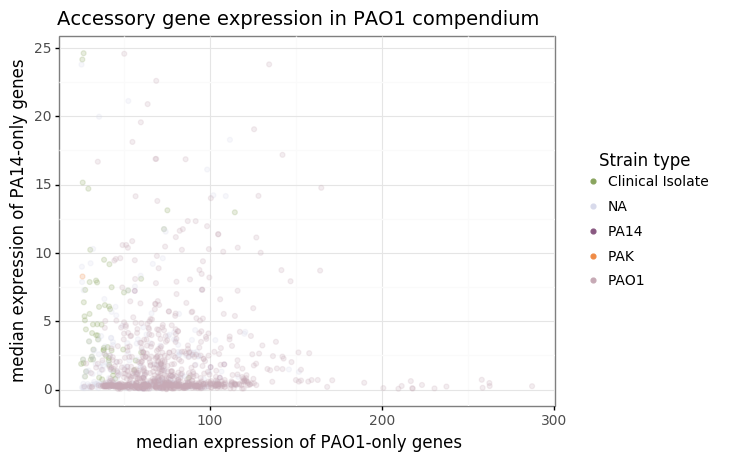

<ggplot: (8726872102217)>


In [15]:
# Plot accessory gene expression in PAO1 compendium
# Note: commented out code is for plotting figure for Georgia's manuscript
colors = {
    "Clinical Isolate": "#89A45E",
    "PA14": "#895881",
    "PAK": "#EF8B46",
    "PAO1": "#C6A9B5",
    "NA": "#D8DAEB",
}
fig1 = pn.ggplot(
    pao1_pa14_acc_pao1_compendium_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig1 += pn.scale_color_manual(values=colors)
fig1 += pn.geom_point(pn.aes(color="Strain type"), alpha=0.2)
fig1 += pn.labs(
    x="median expression of PAO1-only genes",
    y="median expression of PA14-only genes",
    title="Accessory gene expression in PAO1 compendium",
)
fig1 += pn.theme_bw()
fig1 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=12),
    legend_text=pn.element_text(family="sans-serif", size=10),
    plot_title=pn.element_text(family="sans-serif", size=14),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig1 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


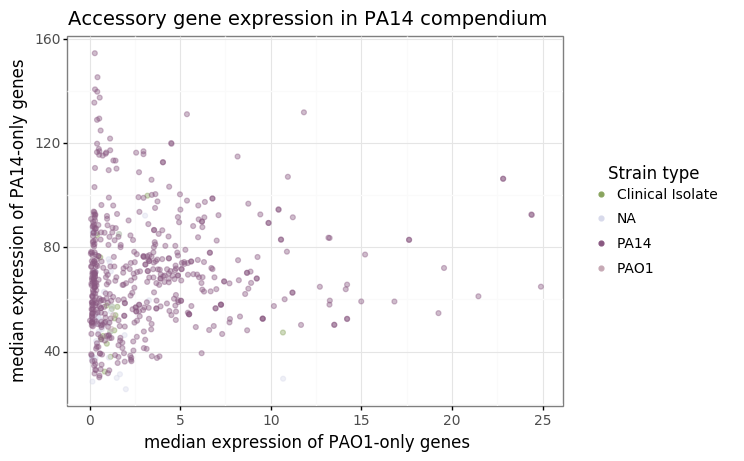

<ggplot: (8726871781401)>


In [16]:
# Plot accessory gene expression in PA14 compendium
fig2 = pn.ggplot(
    pao1_pa14_acc_pa14_compendium_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig2 += pn.scale_color_manual(values=colors)
fig2 += pn.geom_point(pn.aes(color="Strain type"), alpha=0.4)
fig2 += pn.labs(
    x="median expression of PAO1-only genes",
    y="median expression of PA14-only genes",
    title="Accessory gene expression in PA14 compendium",
)
fig2 += pn.theme_bw()
fig2 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=12),
    legend_text=pn.element_text(family="sans-serif", size=10),
    plot_title=pn.element_text(family="sans-serif", size=14),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig2 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig2)

These plots are showing the median expression of PAO1 genes (PAO1 accessory genes) on the x-axis and the median expression of PA14-only genes (PA14 accessory genes) on the y-axis.
Each point is a sample.

If we binned our samples accurately then for samples within our binned PAO1 compendium, we expect that samples will align along the PAO1-only axis. Similarly, for samples within our binned PA14 compendium, we expect that samples will align along the PA14-axis.

## Check

What is the distribution of median accessory gene expression look like for PAO1 binned but non-PAO1 SRA labeled samples compared to PAO1 binned and PAO1 SRA labeled samples? Looks like the non-PAO1 labeled samples may be clustered at the bottom of the distribution. Similarly for PA14 binned samples.

In [17]:
# Get PAO1 samples that are labeled PAO1 and non-PAO1
pao1_binned_pao1_sra = pao1_pa14_acc_pao1_compendium_label.loc[
    pao1_pa14_acc_pao1_compendium_label["Strain type"] == "PAO1",
    "median acc expression_pao1",
]

pao1_binned_non_pao1_sra = pao1_pa14_acc_pao1_compendium_label.loc[
    pao1_pa14_acc_pao1_compendium_label["Strain type"] != "PAO1",
    "median acc expression_pao1",
]

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


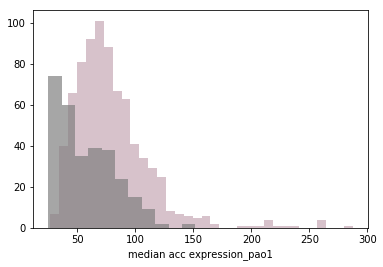

In [18]:
f = sns.distplot(
    pao1_binned_pao1_sra, color="#C6A9B5", kde=False, hist_kws={"alpha": 0.7}
)
f = sns.distplot(
    pao1_binned_non_pao1_sra, color="grey", kde=False, hist_kws={"alpha": 0.7}
)
if threshold == 0:
    plt.axvline(25, 0, 100, color="red")

In [19]:
# Get PA14 samples that are labeled PA14 and non-PA14
pa14_binned_pa14_sra = pao1_pa14_acc_pa14_compendium_label.loc[
    pao1_pa14_acc_pa14_compendium_label["Strain type"] == "PA14",
    "median acc expression_pa14",
]

pa14_binned_non_pa14_sra = pao1_pa14_acc_pa14_compendium_label.loc[
    pao1_pa14_acc_pa14_compendium_label["Strain type"] != "PA14",
    "median acc expression_pa14",
]

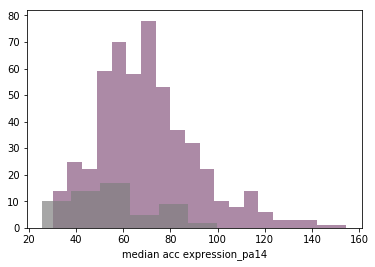

In [20]:
g = sns.distplot(
    pa14_binned_pa14_sra, color="#895881", kde=False, hist_kws={"alpha": 0.7}
)
g = sns.distplot(
    pa14_binned_non_pa14_sra, color="grey", kde=False, hist_kws={"alpha": 0.7}
)
if threshold == 0:
    plt.axvline(25, 0, 100, color="red")